<a href="https://colab.research.google.com/github/Floret-Snow/Hands-on-ML/blob/master/Classification_systems_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Learn classification based on MNIST dataset***


In [1]:
#fetch dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X,y = mnist["data"],mnist["target"]
print(X.shape)
y.shape

(70000, 784)


(70000,)

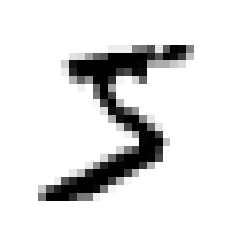

In [3]:
#preview the dataset
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit =X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap ="binary")
plt.axis("off")
plt.show()

In [4]:
y[0]

'5'

In [5]:
#cast y to integeger since most ML algorithm expect numbers

import numpy as np

y = y.astype(np.uint8)

In [6]:
#split data set into train and test

X_train,X_test, y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
#Training a binary classifier
#create target vector for binary number 5 classifier

y_train_5 =(y_train == 5) #true for all 5s, false for all other digits
y_test_5 = (y_test == 5)

In [12]:
#use stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
#Performance measures
#cross validation (use stock cv or build ur own cv function)
from sklearn.model_selection import cross_val_score


In [16]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])